Pandas ดึงข้อมูลจาก Bank Of Thailand API (REST API)

Reference : # https://iapi.bot.or.th/Developer?lang=th 
            # https://www.youtube.com/watch?v=IQhJAr-hcFE
            # https://medium.com/readmoreth/consume-bank-of-thailand-api-using-c-net-c7595f5efd22#:~:text=%E0%B8%81%E0%B8%B2%E0%B8%A3%E0%B8%AA%E0%B8%A1%E0%B8%B1%E0%B8%84%E0%B8%A3%E0%B9%83%E0%B8%8A%E0%B9%89%E0%B8%9A%E0%B8%A3%E0%B8%B4%E0%B8%81%E0%B8%B2%E0%B8%A3%20BOT%20API&text=3.%20%E0%B8%82%E0%B8%B1%E0%B9%89%E0%B8%99%E0%B8%95%E0%B8%AD%E0%B8%99%E0%B8%95%E0%B9%88%E0%B8%AD%E0%B9%84%E0%B8%9B,Client%20ID%20%E0%B9%80%E0%B8%81%E0%B9%87%E0%B8%9A%E0%B9%84%E0%B8%A7%E0%B9%89%E0%B8%81%E0%B9%88%E0%B8%AD%E0%B8%99

In [1]:
import http.client

In [2]:
conn = http.client.HTTPSConnection("apigw1.bot.or.th")
headers = {
    'x-ibm-client-id': "###############",
    'accept': "application/json"
    }
conn.request("GET", "/bot/public/Stat-ReferenceRate/v2/DAILY_REF_RATE/?start_period=2020-04-30&end_period=2020-05-30", headers=headers)
res = conn.getresponse()
data = res.read()



In [3]:
#json or dict
print(data.decode("utf-8"))

{"result":{"timestamp":"2020-06-16 23:38:43","api":"Daily Weighted-average Interbank Exchange Rate - THB / USD","data":{"data_header":{"report_name_eng":"Rates of Exchange of Commercial Banks in Bangkok Metropolis (2002-present)","report_name_th":"อัตราแลกเปลี่ยนเฉลี่ยของธนาคารพาณิชย์ในกรุงเทพมหานคร (2545-ปัจจุบัน)","report_uoq_name_eng":"(Unit: Baht / 1 Unit of Foreign Currency)","report_uoq_name_th":"(หน่วย: บาท ต่อ 1 หน่วยเงินตราต่างประเทศ)","report_source_of_data":[{"source_of_data_eng":"Bank of Thailand","source_of_data_th":"ธนาคารแห่งประเทศไทย"}],"report_remark":[],"last_updated":"2020-06-16"},"data_detail":[{"period":"2020-05-29","rate":"31.8320000"},{"period":"2020-05-28","rate":"31.8710000"},{"period":"2020-05-27","rate":"31.8730000"},{"period":"2020-05-26","rate":"31.9220000"},{"period":"2020-05-25","rate":"31.9740000"},{"period":"2020-05-22","rate":"31.8690000"},{"period":"2020-05-21","rate":"31.8470000"},{"period":"2020-05-20","rate":"31.8780000"},{"period":"2020-05-19","ra

In [4]:
import pandas as pd
%matplotlib inline

In [5]:
# แปลง json ให้เป็น pandas datafreme
j = pd.io.json.loads(data.decode("utf-8"))
print(type(j))
j

<class 'dict'>


{'result': {'timestamp': '2020-06-16 23:38:43',
  'api': 'Daily Weighted-average Interbank Exchange Rate - THB / USD',
  'data': {'data_header': {'report_name_eng': 'Rates of Exchange of Commercial Banks in Bangkok Metropolis (2002-present)',
    'report_name_th': 'อัตราแลกเปลี่ยนเฉลี่ยของธนาคารพาณิชย์ในกรุงเทพมหานคร (2545-ปัจจุบัน)',
    'report_uoq_name_eng': '(Unit: Baht / 1 Unit of Foreign Currency)',
    'report_uoq_name_th': '(หน่วย: บาท ต่อ 1 หน่วยเงินตราต่างประเทศ)',
    'report_source_of_data': [{'source_of_data_eng': 'Bank of Thailand',
      'source_of_data_th': 'ธนาคารแห่งประเทศไทย'}],
    'report_remark': [],
    'last_updated': '2020-06-16'},
   'data_detail': [{'period': '2020-05-29', 'rate': '31.8320000'},
    {'period': '2020-05-28', 'rate': '31.8710000'},
    {'period': '2020-05-27', 'rate': '31.8730000'},
    {'period': '2020-05-26', 'rate': '31.9220000'},
    {'period': '2020-05-25', 'rate': '31.9740000'},
    {'period': '2020-05-22', 'rate': '31.8690000'},
    {'pe

In [6]:
#list ข้างในเป็น dict #เข้าถึงตัว dict ในแต่ละส่วน
j['result']['data']['data_detail']

[{'period': '2020-05-29', 'rate': '31.8320000'},
 {'period': '2020-05-28', 'rate': '31.8710000'},
 {'period': '2020-05-27', 'rate': '31.8730000'},
 {'period': '2020-05-26', 'rate': '31.9220000'},
 {'period': '2020-05-25', 'rate': '31.9740000'},
 {'period': '2020-05-22', 'rate': '31.8690000'},
 {'period': '2020-05-21', 'rate': '31.8470000'},
 {'period': '2020-05-20', 'rate': '31.8780000'},
 {'period': '2020-05-19', 'rate': '31.9200000'},
 {'period': '2020-05-18', 'rate': '32.0460000'},
 {'period': '2020-05-15', 'rate': '32.0820000'},
 {'period': '2020-05-14', 'rate': '32.1060000'},
 {'period': '2020-05-13', 'rate': '32.0820000'},
 {'period': '2020-05-12', 'rate': '32.1430000'},
 {'period': '2020-05-11', 'rate': '32.1500000'},
 {'period': '2020-05-08', 'rate': '32.2800000'},
 {'period': '2020-05-07', 'rate': '32.4470000'},
 {'period': '2020-05-05', 'rate': '32.3810000'},
 {'period': '2020-04-30', 'rate': '32.3620000'}]

In [7]:
# แปลง json ให้เป็น pandas datafreme
df=pd.DataFrame(j['result']['data']['data_detail'])

In [8]:
df

,period,rate
0,2020-05-29,31.8320000
1,2020-05-28,31.8710000
2,2020-05-27,31.8730000
3,2020-05-26,31.9220000
4,2020-05-25,31.9740000
5,2020-05-22,31.8690000
6,2020-05-21,31.8470000
7,2020-05-20,31.8780000
8,2020-05-19,31.9200000
9,2020-05-18,32.0460000


In [9]:
# เช็ค type
df.dtypes

period    object
rate      object
dtype: object

In [10]:
#แปลง datatype
df.period = pd.to_datetime(df.period)
df.rate = pd.to_numeric(df.rate)
df.dtypes

period    datetime64[ns]
rate             float64
dtype: object

In [11]:
#กำหนด period ให้เป็น index
df.set_index('period', inplace=True)

In [12]:
df

,rate
period,
2020-05-29,31.832
2020-05-28,31.871
2020-05-27,31.873
2020-05-26,31.922
2020-05-25,31.974
2020-05-22,31.869
2020-05-21,31.847
2020-05-20,31.878
2020-05-19,31.920


In [13]:
#เรียงลำดับ
df = df.sort_index()

In [14]:
df

,rate
period,
2020-04-30,32.362
2020-05-05,32.381
2020-05-07,32.447
2020-05-08,32.280
2020-05-11,32.150
2020-05-12,32.143
2020-05-13,32.082
2020-05-14,32.106
2020-05-15,32.082


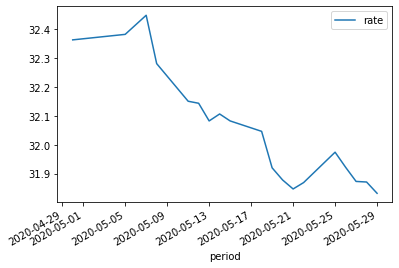

In [15]:
df.plot()